21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Enter the image paths (comma-separated): a.jpg, b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image: a.jpg
Predicted: Dog (78.68%) - Class: golden_retriever
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Image: b.jpg
Predicted: Dog (94.15%) - Class: golden_retriever
--------------------------------------------------


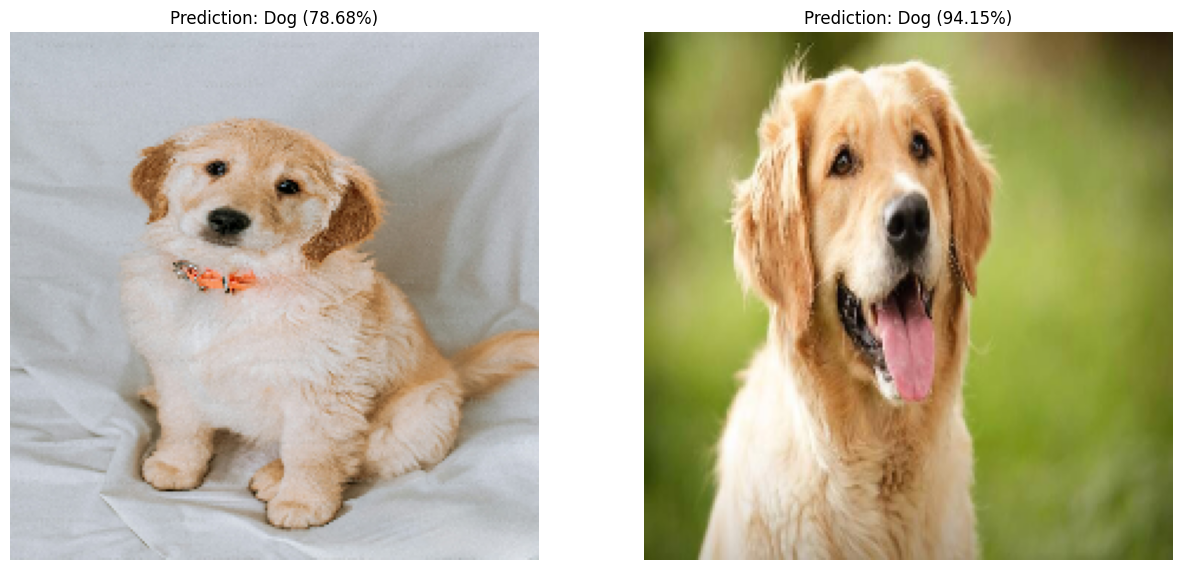

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load pre-trained EfficientNetB0 model
model = EfficientNetB0(weights="imagenet")

# Define ImageNet categories for dogs and cats
DOG_CLASSES = [
    "beagle", "pug", "golden_retriever", "labrador_retriever", "bulldog",
    "german_shepherd", "siberian_husky", "boxer", "dalmatian", "rottweiler",
    "doberman", "great_dane", "chihuahua", "pomeranian", "shih-tzu"
]
CAT_CLASSES = [
    "tabby", "tiger_cat", "persian_cat", "siamese_cat", "egyptian_cat"
]

def load_and_preprocess_image(img_path):
    """Load an image, convert it to RGB, resize it, and preprocess it for EfficientNetB0."""
    img = cv2.imread(img_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize for EfficientNetB0
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand batch dimension
    img_array = preprocess_input(img_array)

    return img_array, img

def classify_image(img_path):
    """Classifies an image as a dog or a cat using EfficientNetB0."""
    try:
        img_array, img = load_and_preprocess_image(img_path)
        preds = model.predict(img_array)
        decoded_preds = decode_predictions(preds, top=3)[0]  # Get top 3 predictions

        # Extract class labels and confidence scores
        best_label = decoded_preds[0][1].lower()  # Best predicted class
        confidence = decoded_preds[0][2] * 100  # Confidence score

        # Check if it belongs to dog or cat categories
        if any(dog in best_label for dog in DOG_CLASSES):
            prediction = "Dog"
        elif any(cat in best_label for cat in CAT_CLASSES):
            prediction = "Cat"
        else:
            prediction = "Neither Dog Nor Cat"

        return prediction, confidence, best_label, img

    except Exception as e:
        print(f"Error: {e}")
        return None, None, None, None

def classify_multiple_images(image_paths):
    """Classifies multiple images and displays results."""
    results = []

    for img_path in image_paths:
        prediction, confidence, label, img = classify_image(img_path)
        if prediction:
            results.append((prediction, confidence, label, img))
            print(f"Image: {img_path}")
            print(f"Predicted: {prediction} ({confidence:.2f}%) - Class: {label}")
            print("-" * 50)

    # Display all images with their predictions
    plt.figure(figsize=(15, 10))
    for i, (prediction, confidence, label, img) in enumerate(results):
        plt.subplot(1, len(results), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Prediction: {prediction} ({confidence:.2f}%)")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Get list of image paths from user (comma-separated)
    image_paths = input("Enter the image paths (comma-separated): ").split(",")
    image_paths = [path.strip() for path in image_paths]  # Remove extra spaces

    classify_multiple_images(image_paths)